# Data Preview

In [21]:
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'latin-1')
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [67]:
df.isnull().sum() #check no missing data

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [68]:
df.rename(columns={'Temperature(°C)': 'Temperature',
                   'Humidity(%)': 'Humidity', 
                   'Wind speed (m/s)': 'Wind Speed',
                   'Visibility (10m)': 'Visibility',
                   'Dew point temperature(°C)': 'Dew Point',
                   'Solar Radiation (MJ/m2)': 'Solar Radiation',
                   'Rainfall(mm)': 'Rainfall',
                   'Snowfall (cm)': 'Snowfall'},
          inplace=True)

In [69]:
df[(df['Functioning Day'] == 'No') & (df['Rented Bike Count'] != 0)] #check no bikes rented on no-functioning days

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day


# Exploratory Data Analysis
In this section, we will use the records from functioning days only.

In [70]:
df = df[df['Functioning Day'] == 'Yes'] #keep functioning days only

Text(0.5, 1.0, 'Average Hourly Rented Bikes by Seasons')

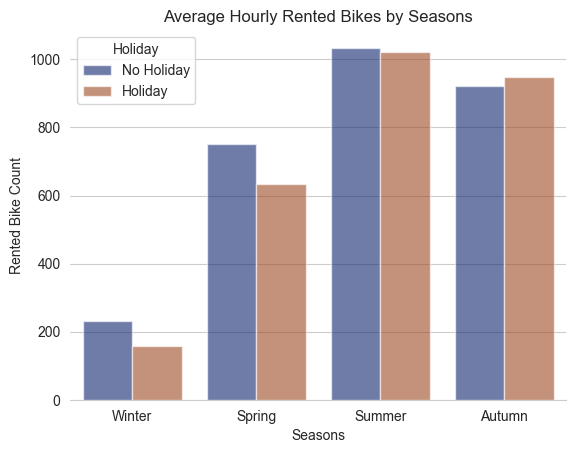

In [80]:
import seaborn as sns
sns.set_style("whitegrid")

g_seasons = sns.barplot(data = df,
                        x = "Seasons", y = "Rented Bike Count", hue = "Holiday", palette = "dark", alpha = .6,
                        errorbar = None)
sns.despine(left = True)
g_seasons.set_title("Average Hourly Rented Bikes by Seasons")

In [73]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].dt.month

bar_data = df.groupby('Month')['Rented Bike Count'].mean().reset_index()
line_data = df.groupby('Month')['Temperature'].mean().reset_index()

In [85]:
month_data = pd.merge(bar_data, line_data, on = 'Month')

In [88]:
month_data.head(12)

,Month,Rented Bike Count,Temperature
0,1,201.620968,-3.943145
1,2,225.941964,-1.664732
2,3,511.551075,8.044489
3,4,753.199713,12.950862
4,5,982.066667,18.233472
5,6,1245.676389,23.136806
6,7,987.177419,27.763978
7,8,876.192204,28.736425
8,9,1079.506410,21.748718
9,10,978.458647,12.675338


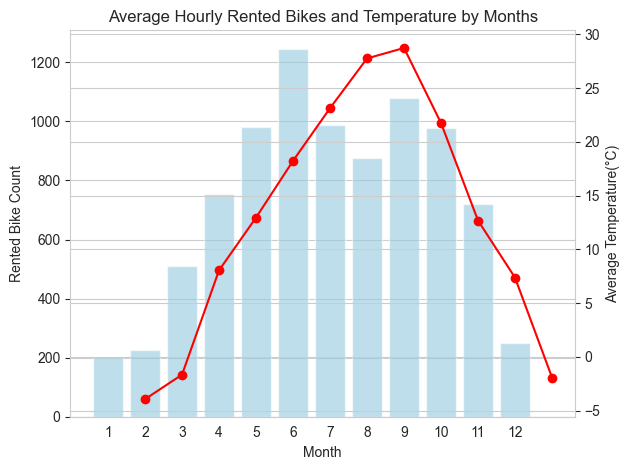

In [89]:
fig, ax1 = plt.subplots()

# Bar plot
sns.barplot(data=month_data, x='Month', y='Rented Bike Count', ax=ax1, color='skyblue', alpha=.6)
sns.despine(left = True)
ax1.set_ylabel('Rented Bike Count')

# Line plot
ax2 = ax1.twinx()
ax2.plot(month_data['Month'], month_data['Temperature'], color='red', marker='o', label='Temperature')
ax2.set_ylabel('Average Temperature(°C)')

# Optional enhancements
ax1.set_title('Average Hourly Rented Bikes and Temperature by Months')
#ax1.set_xticks(range(0,12))
#ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
fig.tight_layout()
plt.show()
